In [1]:
import pandas as pd 
from clear_txt import *
from data_path import *
from to_chart import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ademoguzhanozdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=migros_raw_products

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15387 entries, 263 to 3843
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 15387 non-null  object 
 1   urunKategorileri       15387 non-null  object 
 2   urunKategorileriTwo    15385 non-null  object 
 3   urunKategorileriThree  14945 non-null  object 
 4   urunKategorileriFour   8745 non-null   object 
 5   urunKategorileriFive   7 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                15385 non-null  object 
 9   urunAciklama           12935 non-null  object 
 10  urunFoto               15387 non-null  object 
 11  urunURL                15385 non-null  object 
 12  Unnamed: 8             0 non-null      float64
dtypes: float64(3), object(10)
memory usage: 1.6+ MB


## Null Marka ve Ürün Adlarını Temizledim


In [4]:
df = df.dropna(subset=['uMarka'])
df = df.dropna(subset=['urunAdi'])

In [5]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15385 entries, 263 to 3843
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   uMarka                 15385 non-null  bool 
 1   urunKategorileri       15385 non-null  bool 
 2   urunKategorileriTwo    15385 non-null  bool 
 3   urunKategorileriThree  15385 non-null  bool 
 4   urunKategorileriFour   15385 non-null  bool 
 5   urunKategorileriFive   15385 non-null  bool 
 6   urunKategorileriSix    15385 non-null  bool 
 7   urunKategorileriSeven  15385 non-null  bool 
 8   urunAdi                15385 non-null  bool 
 9   urunAciklama           15385 non-null  bool 
 10  urunFoto               15385 non-null  bool 
 11  urunURL                15385 non-null  bool 
 12  Unnamed: 8             15385 non-null  bool 
dtypes: bool(13)
memory usage: 315.5 KB


## Unnamed Kolonunu Sildim

In [6]:
del df['Unnamed: 8']

### Unique Kategorilere Bakalım

In [7]:
df.nunique()

uMarka                    1394
urunKategorileri            14
urunKategorileriTwo         88
urunKategorileriThree      421
urunKategorileriFour       563
urunKategorileriFive         3
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15209
urunAciklama             12153
urunFoto                 15077
urunURL                  15219
dtype: int64

#### 10 Ana Kategori Olması Gerekirken 14 Gözüküyor. Temizleyelim  

In [8]:
def unique(list1):
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [9]:
unique(df["urunKategorileri"])


Deterjan, Temizlik
Kağıt, Kozmetik
Ev, Pet
Gıda, Şekerleme
Bebek, Oyuncak
İçecek
Süt, Kahvaltılık
Meyve, Sebze
Et, Tavuk, Balık
Shoulders
Elektronik
Bugün Eklenenler
Guy
Oreal


In [10]:
df[df["urunKategorileri"]=='Elektronik']

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
4080,General Home,Elektronik,"Aydınlatma, Elektrik Malzemeleri","Işıldak, El Feneri",NaN,NaN,NaN,NaN,General Home El Feneri Df-25 - Migros,"&lt;p&gt;&lt;span style="";color: black;"";&gt;2...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/general-home-el-fene...
4127,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood Dekoratif Led Işık Kavanoz 10'lu - ...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-dekoratif...
118,i'think,Elektronik,Görüntü Ve Ses Sistemleri,Kulaklık,NaN,NaN,NaN,NaN,i'think New Universal Mikrofonlu Kulaklık - Mi...,&lt;p&gt;I';think New Universal Mikrofonlu Kul...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-new-universal...
4192,Everest,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar Aksesuarları,NaN,NaN,NaN,NaN,Everest Km-g77 X-Vayne Siyah Oyun Klavye + Mou...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/everest-km-g77-x-vay...
120,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Şarj Data Kablo 1.2 Metre (Mikro Uyuml...,"&lt;p&gt;&lt;span style="";color: rgb(117, 117,...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-sarj-data-kab...
112,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Çift Usb Girişli 2.1A Araç İçi Şarj Ci...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-cift-usb-giri...
4183,Apple,Elektronik,Telefon Ve Aksesuarları,Telefon,NaN,NaN,NaN,NaN,Iphone 12 Mini 64 Gb Kırmızı Cep Telefonu - Mi...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/iphone-12-mini-64-gb...
4060,Kiwi,Elektronik,Elektrikli Ev Aletleri,Küçük Ev Aletleri,Diğer Küçük Ev Aletleri,NaN,NaN,NaN,Kiwi Klb-1610 Elektrikli Sefer Tası - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/kiwi-klb-1610-elektr...
4190,Samsung,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar,NaN,NaN,NaN,NaN,Samsung Galaxy Tab A8 T290 Siyah Tablet - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/samsung-galaxy-tab-a...
121,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Telefon Kapak Çeşitleri - Migros,"&lt;p&gt;&lt;span style="";color: rgb(117, 117,...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-telefon-kapak...


### Yanlış Eklenen Kategori Az Olduğu İçin Sildim

In [11]:
df.drop(df[df["urunKategorileri"]=='Oreal'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Guy'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Shoulders'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Bugün Eklenenler'].index, inplace = True) 

In [12]:
df.nunique()

uMarka                    1388
urunKategorileri            10
urunKategorileriTwo         87
urunKategorileriThree      420
urunKategorileriFour       558
urunKategorileriFive         1
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15065
urunAciklama             12033
urunFoto                 14933
urunURL                  15075
dtype: int64

In [13]:
df["uMarka"]=df["uMarka"].str.capitalize()

In [14]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,15235,15235,15235,14795,8628,4,15235,12804,15235,15233
unique,1387,10,87,420,558,1,15065,12033,14933,15075
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Hobby Style&Protect Jöle Islak 250 Ml - Migros,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/loreal-paris-fap-col...
freq,479,3742,1343,254,205,4,2,98,145,2


### Birebir Aynı Olan Satırları Sildim

In [15]:
df.drop_duplicates(keep = False, inplace = True)

In [16]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,14919,14919,14919,14479,8506,4,14919,12616,14919,14917
unique,1384,10,87,420,558,1,14907,11951,14775,14917
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,M Toys Bebek - Migros,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/golden-rose-dipliner...
freq,479,3426,1343,254,189,4,2,98,145,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14919 entries, 263 to 3843
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 14919 non-null  object 
 1   urunKategorileri       14919 non-null  object 
 2   urunKategorileriTwo    14919 non-null  object 
 3   urunKategorileriThree  14479 non-null  object 
 4   urunKategorileriFour   8506 non-null   object 
 5   urunKategorileriFive   4 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                14919 non-null  object 
 9   urunAciklama           12616 non-null  object 
 10  urunFoto               14919 non-null  object 
 11  urunURL                14917 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.5+ MB


### Ürün Açıklama Kolonunu Düzenleyelim

In [18]:
df["urunAciklama"] = df["urunAciklama"].astype(str).apply(remove_html)

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_colwidth',10000)


In [20]:
df.head(200)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
263,Vernel,"Deterjan, Temizlik",Çamaşır Yıkama,Yumuşatıcı,Konsantre Çamaşır Yumuşatıcıları,NaN,NaN,NaN,Vernel Max Aromatherapy Mineral&Hindistan Cevizi 1.440 Ml - Migros,"Vernel Max Aromatherapy+ doğanın\ntazeliğini ve sakinleştirici etkisini giysinize taşımanız için özel olarak\ntasarlanmıştır. Kremsi\nformülü ile duyularınızı rahatlatan ve ruhunuzu besleyen Vernel Max’ın kalıcı\nkokuları şimdi sizi bekliyor! Vernel Max’ın içeriğindeki özel parfüm\nkapsülleri, yeni yıkanmış giysilerinizi giydiğinizde her hareket ve\ndokunuşunuzda akive olur ve size uzun süreli ferahlık verir. Böylece yeni\nVernel Max Aromatherapy+ ile : Giysilerinizde yeni yıkanmış ferahlık hissini uzun süre yaşarsınız.\n Mükemmel yumuşaklığı\nhissedersiniz. Paradan\ntasarruf edersiniz. Daha\naz ağırlık taşırsınız. Nasıl kullanmalıyım? Vernel Max’ı kullanmak çok kolay. Her yıkamada çamaşır makinenizin\nyumuşatıcı bölümüne doğru miktarda koymanız önemli.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/30570170/30570170-25990c.jpg,https://www.migros.com.tr/vernel-max-aromatherapy-mineralhindistan-cevizi-1440-ml-p-1d276ba
1498,Rimmel london,"Kağıt, Kozmetik",Makyaj,Dudak Ürünleri,Dudak Kalemi,NaN,NaN,NaN,Rimmel Ex Auto Lip Liner 063 - Eastend - Migros,nan,https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/35401233/35401233-b9deeb.jpg,https://www.migros.com.tr/rimmel-ex-auto-lip-liner-063-eastend-p-21c2e11
3995,Tulu,"Ev, Pet",Mutfak Eşyaları,Bardak,Fincan Takımı,NaN,NaN,NaN,Tulu Porselen Mavi Fil 2'li Luna Kahve Set - Migros,nan,https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/33057902/33057902-c836db.jpg,https://www.migros.com.tr/tulu-porselen-mavi-fil-2li-luna-kahve-set-p-1f86c6e
162,Yayla,"Gıda, Şekerleme",Bakliyat,Pirinç,Osmancık Pirinç,NaN,NaN,NaN,Yayla Yerli Pirinç Osmancık Bölgesi 1 Kg - Migros,"Hemen her yemeğe eşlik eden güzel pilavlar pişirmek için güvenle tercih\nedebileceğiniz Yayla Yerli Osmancık Pirinç; çorba, dolma ve zeytinyağlı\nyemeklerde ya da sütlaç ve zerde gibi tatlılarda da kullanılabiliyor. \n Pirincinizi bir süre suda bekleterek fazla nişastasının akmasını\nsağlayabilirsiniz. Suyu iyice süzülen pirinci orta ateşte\nkavurursanız, pilavınız daha kısa sürede pişer. Pilav pişirmek için\ndüz ve yayvan bir tencere kullanırsanız, pilavınız tane tane\nolur. Paketi açıldıktan sonra, pirincinizi nem ve kokudan muaf,\nyaklaşık 18 derecelik bir ortamda saklanırsa daha uzun süre dayanır. \n İşletme Kayıt\nNo TR-06-K-000171 Net Miktar\n(g/ml) 1000 Menşei TÜRKİYE İçindekiler PİRİNÇ. Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı YAYLA AGRO GIDA\nSAN.VE NAK.A.Ş Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/01010091/yayla-osmancik-pirinc1-kg-e890a4.jpg,https://www.migros.com.tr/yayla-yerli-pirinc-osmancik-bolgesi-1-kg-p-f69ab
731,Viored,"Kağıt, Kozmetik",Saç Bakım,Saç Boyası,Set Boya,NaN,NaN,NaN,Viored Natural 1.0 Siyah Set Boya 50 Ml - Migros,nan,https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34488572/34488572-539282.JPG,https://www.migros.com.tr/viored-natural-10-siyah-set-boya-50-ml-p-20e40fc
276,Yayla,"Gıda, Şekerleme",Bakliyat,Bulgur,Katkılı Bulgur,NaN,NaN,NaN,Yayla Gurme Fit Nohutlu Bulgur 360 G - Migros,"Yayla Gurme Fit Nohutlu Bulgur , özel beslenenler ve doğal\nmutfaklar için&;nbsp;

### En Çok Ürün Hangi Kategoride Bakalım

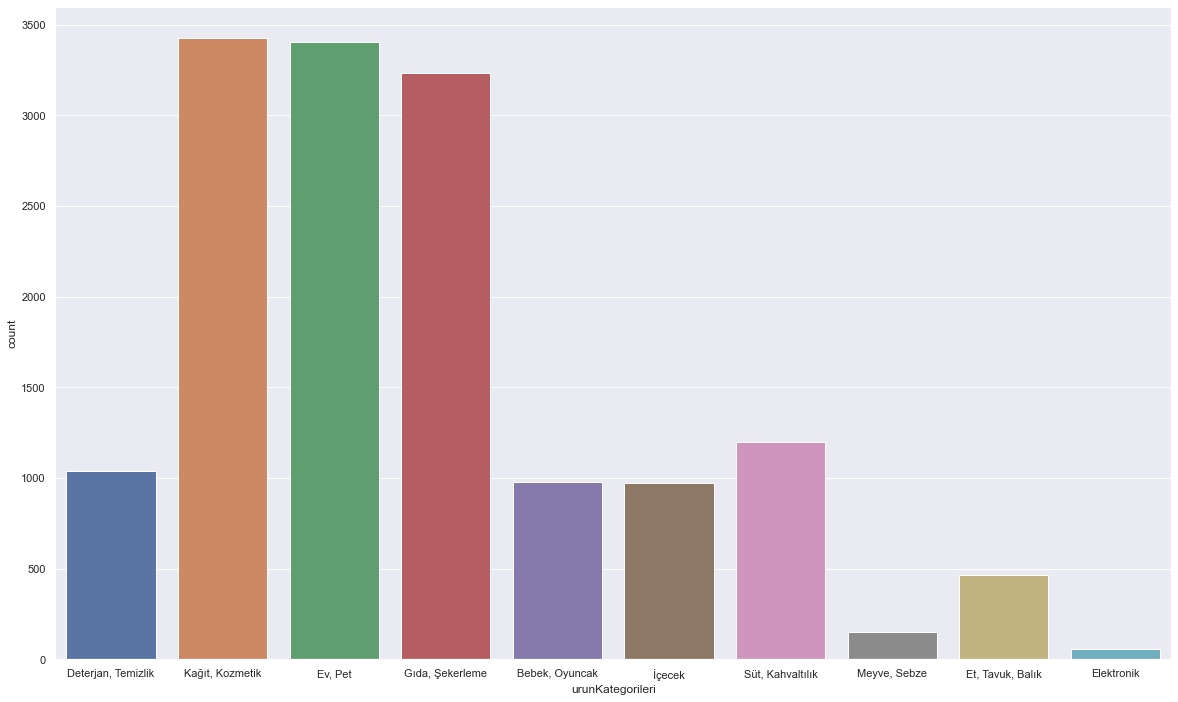

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(20, 12))

ax = sns.countplot(x="urunKategorileri", data=df)

In [22]:
kagitKozmetik=df[df["urunKategorileri"] == "Kağıt, Kozmetik"]

### Top 10 Kağıt Kozmetik Markaları

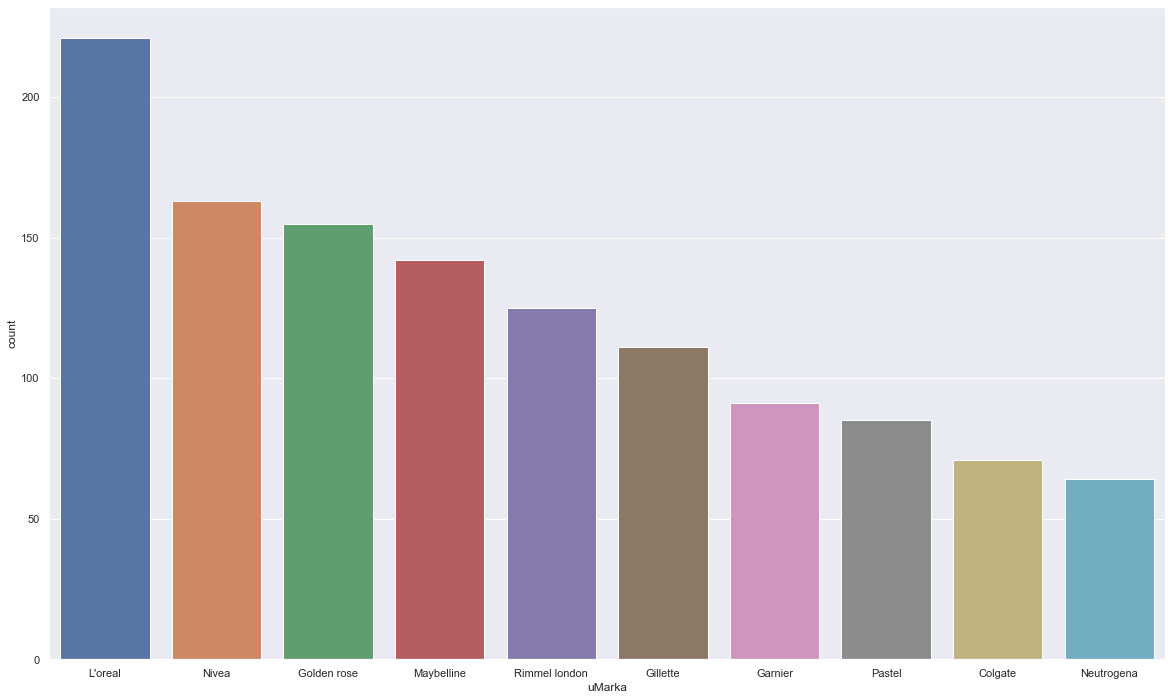

In [23]:
sns.set()
plt.figure(figsize=(20, 12))
sns.countplot(x='uMarka',data=kagitKozmetik,order=pd.value_counts(kagitKozmetik['uMarka']).iloc[:10].index)


### Aynı İsme Sahip Olan Ürünleri Listeleyelim

In [24]:
pd.value_counts(kagitKozmetik['urunAdi']).iloc[:3]

Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros    2
Gillette Venus Breeze Kadın Tıraş Makinesi Yedekli - Migros          1
Molped Ultra Ped Normal 10'lu - Migros                               1
Name: urunAdi, dtype: int64

In [25]:
# 1 Tane çıktı. İsimleri aynı açıklamaları farklı.

In [26]:
kagitKozmetik[kagitKozmetik.urunAdi == "Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros"]

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
104,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Saçın Yeniden Yapılandırılmasında Rol Oynayan En Önemli Aminoasitlerden\nBiri Olan Arginine Mikro Sirkülasyonu Hızlandırarak Saçı Kökten Uca Beslemeye\nYardımcı Olur. Saç Dökülmelerinde Gözle Görülür Azalma. Saçlar\ngüçlenerek uzar. Saçı dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Bir müşteri, aynı gün içerisinde, bu\nüründen en fazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri\nMigros Ticaret A.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255782/34255782_etiket-cd0481.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a6
103,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan Saçlar güçlenerek\nuzar. Saçı koparak dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Saçın yeniden yapılandırılmasında rol oynayan en\nönemli aminoasitlerden biri olan Arginine mikro sirkülasyonu hızlandırarak,\nsaçı kökten uca beslemeye yardımcı olur. Saç Dökülmelerinde Gözle\nGörülür Azalma Bir müşteri, aynı gün içerisinde, bu üründen en\nfazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri Migros Ticaret\nA.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255777/34255777_urundetay-b75b44.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a1


In [27]:
sutKahvalti=df[df["urunKategorileri"] == "Süt, Kahvaltılık"]

In [28]:
yumurta=sutKahvalti[sutKahvalti["urunKategorileriTwo"]=="Yumurta"]

In [29]:
yumurta.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,24,24,24,0,0,0,24,24,24,24
unique,12,1,1,0,0,0,24,24,24,24
top,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,Keskinoğlu Free Range M 10'lu Yumurta - Migros,"Kor Organik 10';lu M Orta Boy Yumurta serbest dolaşan ve\nözenle beslenen tavuklardan elde edilir. 10 adet lezzetli, orta boy yumurta\niçerir. İşletme Kayıt\nNo TR35-0631 Kullanım Önerileri Satın\naldıktan sonra buzdolabında/soğukta muhafaza\nediniz. Menşei TÜRKİYE İçindekiler YUMURTA Alerjen\nUyarısı YUMURTA Saklama Koşulları 3-8 °C\nmuhafaza ediniz Gıda İşletmecisi / Üretici / İthalatçı /\nDağıtıcı KOR AGRO ORGANİK GIDA İNŞ.ENERJİ SAN.VE\nTİC.A.Ş. Ürün Bilgilerini Kullanma Hakkında İnternet\nsitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri,\nürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel\nbilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış\nkanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması\nhalinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001997/20001997-1ad938.jpg,https://www.migros.com.tr/yumurtacim-6li-m-boy-yumurta-53-62-g-p-13134b6
freq,7,24,24,NaN,NaN,NaN,1,1,1,1


In [30]:
yumurta.head(24)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
1123,Orvital,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Orvital Organik 10'lu M Orta Boy Yumurta (53-62 G) - Migros,"Orvital Organik Yumurta , ailece keyifle tüketebileceğiniz\nüründür. Hijyenik koşullarda paketlenmiş olan yumurtalar\norganik hayvancılık esaslarına göre üretilmiştir. Kahvaltıda, çorbalarda,\nhamur işlerinde kullanabilirsiniz. İşletme Kayıt\nNo TR-55-0166 Kullanım Önerileri SATIN\nALDIKTAN SONRA BUZDOLABINDA/SOĞUKTA MUHAFAZA\nEDİNİZ. Menşei TÜRKİYE İçindekiler ORGANİK\nYUMURTA Alerjen\nUyarısı YUMURTA Saklama Koşulları Serin\nve Kuru ortamda muhafaza ediniz Gıda İşletmecisi / Üretici /\nİthalatçı / Dağıtıcı ORVİTAL ORGANİK GIDA ÜR.VE DAN.SAN.VE\nTİC.LTD.ŞTİ. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001940/orvital-organik-10-lu-m-orta-boy-yumurta-53-62-gr-51e514.jpg,https://www.migros.com.tr/orvital-organik-10lu-m-orta-boy-yumurta-53-62-g-p-1313494
1125,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım 6'lı M Boy Yumurta (53-62 G) - Migros,"Yumurtacım 6';lı M Boy Yumurta , besleyici yiyeceklerin\nbaşında gelen yumurtayı tüm tazeliği ve lezzeti ile sofralarınıza taşır. 6';lı\nşekilde satılan orta boy yumurtalar, haşlanarak, omlet ya da menemen şeklinde\nkeyifle tüketilebileceği gibi pek çok yemek tarifinin de olmazsa olmazı olur.\n İşletme Kayıt No TR03-0061 Kullanım\nÖnerileri RAFADAN:3,5 DK ALALOP: 5 DK KATI:10 DK TEFLON TAVADA: 4\nDK Menşei TÜRKİYE İçindekiler YUMURTA Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı KUMARTAŞLI GIDA VE\nNAKLİYE TİCARET SAN.LTD.ŞTİ. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001974/20001974-2d0663.jpg,https://www.migros.com.tr/yumurtacim-6li-m-boy-yumurta-53-62-g-p-13134b6
1129,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım Omega 3 10'Lu M Boy Yumurta (53-62 G) - Migros,"Yumurtacım Omega 3 10';lu M Boy Yumurta , omega 3 açısından\nzengin yemler ile beslenen tavuklardan elde edilir. Orta büyüklükte boyuta\nsahip birbirinden lezzetli yumurtalar, kahvaltıda haşlanarak omlet ya da\nmenemen şeklinde tüketilebileceği gibi pek çok yemek tarifinin de kilit\nmalzemesi olarak mutfaklarda yerini alır. Günde zinde bir\nbaşlangıç yapmak istediğiniz durumlarda kahvaltıda yumurta tüketmeniz uzun\nsüre tok hissetmenize yardımcı olur. İşletme Kayıt\nNo TR 03-0061 Kullanım\nÖnerileri RAFADAN:3,5 DK ALALOP: 5 DK KATI:10 DK TEFLON TAVADA: 4\nDK Menşei TÜRKİYE İçindekiler YUMURTA Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı KUMARTAŞLI GIDA VE\nNAKLİYE TİCARET SAN.LTD.ŞTİ. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması hal

most_15_words(df["urunAdi"])

In [ ]:
most_15_word(df["urunAdi"][df["urunKategorileri"]=="Süt, Kahvaltılık"])